# SQL Basics

이 노트북은 SQL 기초 학습을 위한 템플릿입니다. 🚀

# SQL Basics 03: SQL → pandas 연동

이 챕터에서는 SQL 데이터를 **Python pandas**와 연결합니다.  
- sqlite3 + pandas 사용  
- SQL 쿼리 결과를 DataFrame으로 변환  
- pandas를 이용한 추가 분석


In [1]:
import sqlite3
import pandas as pd

# sample.db 불러오기
conn = sqlite3.connect("sample.db")

print("✅ sample.db 연결 완료")


✅ sample.db 연결 완료


## 📥 SQL → pandas

pandas의 `read_sql()`을 사용하면 SQL 결과를 바로 DataFrame으로 불러올 수 있습니다.  
예: users 테이블 전체 조회


In [2]:
df_users = pd.read_sql("SELECT * FROM users", conn)
df_users


,id,name,age,city
0,1,Alice,25,Seoul
1,2,Bob,30,Busan
2,3,Charlie,35,Incheon


## 📦 JOIN 결과 → DataFrame

SQL에서 JOIN한 결과를 pandas로 불러오기.  
예: 사용자 이름, 상품, 수량


In [3]:
df_orders = pd.read_sql("""
SELECT u.name, o.product, o.amount
FROM orders o
JOIN users u ON o.user_id = u.id
""", conn)

df_orders


,name,product,amount
0,Alice,Laptop,1
1,Bob,Mouse,2
2,Bob,Keyboard,1
3,Charlie,Monitor,1


## 📊 pandas로 추가 분석

SQL로 가져온 DataFrame은 pandas의 기능을 그대로 활용할 수 있습니다.  
예: 사용자별 총 주문 수량


In [4]:
df_orders.groupby("name")["amount"].sum()


name
Alice      1
Bob        3
Charlie    1
Name: amount, dtype: int64

## 📊 사용자별 주문 수량 시각화

pandas + matplotlib을 이용해 사용자별 총 주문 수량을 막대그래프로 시각화합니다.


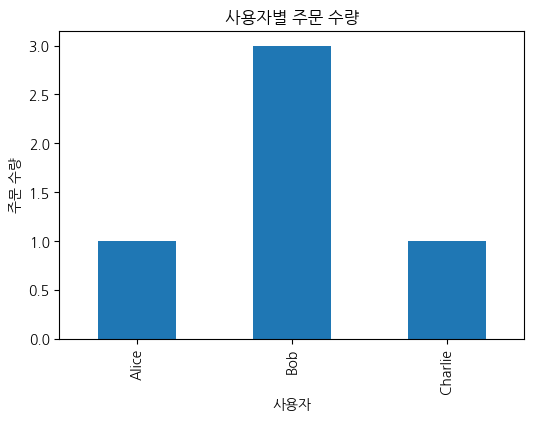

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# 한글 + 이모지 폰트 설정 (운영체제별로 자동 감지)
if platform.system() == 'Linux':
    plt.rcParams['font.family'] = 'NanumGothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Windows
    plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너 경고 방지 (음수 마크 깨지는 현상 등)
plt.rcParams['axes.unicode_minus'] = False

# 사용자별 주문 합계
order_sum = df_orders.groupby("name")["amount"].sum()

# 시각화
order_sum.plot(kind="bar", figsize=(6,4))
plt.title("사용자별 주문 수량")
plt.xlabel("사용자")
plt.ylabel("주문 수량")
plt.show()


## ✅ 정리

이번 챕터에서 배운 것:
- pandas `read_sql()`로 SQL → DataFrame 변환
- SQL JOIN 결과를 DataFrame으로 불러오기
- pandas로 추가 분석 (groupby 등)

👉 SQL 기초 학습 완료 🎉  
이제 이 DB와 pandas를 활용해 **크롤링 데이터 파이프라인**으로 이어갑니다!
